In [1]:
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import h5py



8953
number of CASINO BSE electrons 8440


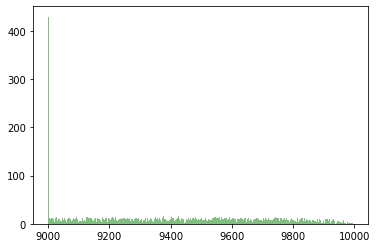

In [2]:
file = 'CASINO/E.dat'
# regex the backscattered eletron data
# sed -n '/'^yes'/,/'---'/p' > BSE_10kV.dat
# sed '/^yes/d' BSE_10kV.dat > BSe_10kV_data.dat
df = pd.read_csv(file,  sep='\t', index_col=None, header = None, error_bad_lines=False)
#print 'header'
energy_CASINO = df.loc[:, 6].values
print (len(energy_CASINO))
print ('number of CASINO BSE electrons', len(energy_CASINO[energy_CASINO>9.01]))
num_bins = 1000
n_C, bins_C, patches_C = plt.hist(energy_CASINO*1000., num_bins, facecolor='green', alpha=0.5)

bins_mean = [0.5 * (bins_C[i] + bins_C[i+1]) for i in range(len(n_C))]

trace_CASINO = go.Scatter(x = bins_mean, 
                          y = n_C, 
                          marker=dict(
                               color = 'rgba(127, 201, 127, .9)',),
                          name = 'CASINO',)
#trace_CASINO = go.Histogram(x=energy_CASINO*1000., 
#                           name='casino', 
#                          autobinx = False,
#                          marker=dict(
#                          color = 'rgba(2, 12, 193, .9)',), 
#                          xbins =dict(start = 5000., 
#                                 end = 30000., 
#                                 size = 1, ),
#                           )


In [5]:
file_discr = 'data/BSE_70tilt_ds_MCMLCS.out'

BSE_discr = []
with open(file_discr) as f:
    lines = f.read().splitlines()
BSE_discr = [float(line) for line in lines]
print ('number of discretly scattered BSE', len(BSE_discr))

n_d, bins_d, patches_d = plt.hist(BSE_discr, num_bins, facecolor='blue', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d))]

trace_discr = go.Scatter(x = bins_mean, 
                         y = n_d, 
                        marker=dict(
                               color = 'rgba(190, 174, 212 .9)',),
                        name = 'discrete',)

#trace_discr = go.Histogram(x=BSE_discr, 
#                          name = 'discrete', 
#                          autobinx = False,
#                          marker=dict(
#                         color = 'rgba(2, 182, 193, .9)',), 
#                          xbins =dict(start = 5000., 
#                                 end = 30000., 
#                                 size = 1, ),
                          #histnorm='probability'
#                          )



file_cont = 'data/BSE70tiltcont.out'

BSE_cont = []
with open(file_cont) as f:
    lines = f.read().splitlines()
BSE_cont = [float(line) for line in lines]

print ('number of continuously scattered BSE', len(BSE_cont))

n_c, bins_c, patches_c = plt.hist(BSE_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                        name = 'continuous',)
                            
    
#trace_cont = go.Histogram(x=BSE_cont, 
#                         marker=dict(
#                         color = 'rgba(255, 182, 193, .9)',),
#                         name = 'continuous', 
                         #histnorm='probability'
#                         )
layout_log = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 1 eV bin (#/1 eV)', 
             zerolinecolor='#969696', 
             range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[9017, 10000])
    )

datatrace = [trace_CASINO, trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'BSE per 1eV at 75 tilt')

FileNotFoundError: [Errno 2] No such file or directory: 'data/BSE_70tilt_ds_MCMLCS.out'

In [3]:
import h5py
file_name = 'data/BSE70tiltcont.h5'
h5data = h5py.File(file_name,'r+')   
print("Keys: %s" % h5data['BSE']['axis1'][:])

energycont = h5data['BSE']['block0_values'][0]


n_c, bins_c, patches_c = plt.hist(energycont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_discr = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                        name = 'continuous',)
                            
    
#trace_cont = go.Histogram(x=BSE_cont, 
#                         marker=dict(
#                         color = 'rgba(255, 182, 193, .9)',),
#                         name = 'continuous', 
                         #histnorm='probability'
#                         )
layout_log = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 1 eV bin (#/1 eV)', 
             zerolinecolor='#969696', 
             range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[9017, 10000])
    )

datatrace = [trace_CASINO, trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'BSE per 1eV at 75 tilt')




file_name = 'data/BSE70tiltDS.h5'
h5data = h5py.File(file_name,'r+')   
print("Keys: %s" % h5data['BSE']['axis1'][:])

energyDS = h5data['BSE']['block0_values'][0]


n_c, bins_c, patches_c = plt.hist(energyDS, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(190, 174, 212 .9)',),
                        name = 'discrete',)
                            
    
#trace_cont = go.Histogram(x=BSE_cont, 
#                         marker=dict(
#                         color = 'rgba(255, 182, 193, .9)',),
#                         name = 'continuous', 
                         #histnorm='probability'
#                         )
layout_log = go.Layout(
        title = '10 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 1 eV bin (#/1 eV)', 
             zerolinecolor='#969696', 
             range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             range=[9017, 10000])
    )

datatrace = [trace_CASINO, trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'BSE per 1eV at 75 tilt at 30')


OSError: Unable to open file (unable to open file: name = 'data/BSE70tiltcont.h5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [ ]:
BSE70tiltcont.out

In [14]:
num_bins = 30

# discrete
file_discr = 'data/Al_BSE70_tiltDS_Emin15000_Emax30000.h5'

h5data_d = h5py.File(file_discr,'r+')   
energyDS = h5data_d['BSE']['block0_values'][0]
print 'number of discretly scattered BSE', len(energyDS)

n_d, bins_d, patches_d = plt.hist(energyDS, num_bins, facecolor='blue', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d))]

trace_discr = go.Scatter(x = bins_mean, 
                         y = n_d, 
                        marker=dict(
                               color = 'rgba(190, 174, 212 .9)',),
                        name = 'discrete',)


# continuous
file_cont = 'data/Al_BSE70_tiltcont_Emin15000_Emax30000.h5'

h5data_c = h5py.File(file_cont,'r+')   
energy_cont = h5data_c['BSE']['block0_values'][0]

print 'number of continuously scattered BSE', len(energy_cont)

n_c, bins_c, patches_c = plt.hist(energy_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                        name = 'continuous',)
                            
    

layout_log = go.Layout(
        title = '30 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 5 eV bin (#/5 eV)', 
             zerolinecolor='#969696', 
            # range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             #range=[9017, 10000]
        )
    )

datatrace = [trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = '30 keV BSE per 5eV at 70 tilt')

SyntaxError: invalid syntax (<ipython-input-14-f5e9020d22fc>, line 8)

yield of discretly scattered BSE 0.36912727272727275
yield of new discretly scattered BSE 0.08612727272727273
yield of continuously scattered BSE 0.16734545454545455
yield of new continuously scattered BSE 0.16685454545454545


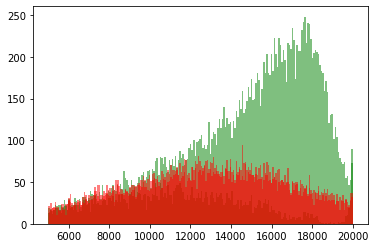

In [11]:
num_bins = 200
inc_e = 55000

# discrete
all_el = pd.read_hdf('data/Al_BSE_DS_normal_longer.h5', 'all_electrons')
energyDS = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of discretly scattered BSE', len(energyDS)/inc_e)

n_d, bins_d, patches_d = plt.hist([float(energy) for energy in energyDS], num_bins, facecolor='green', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d)-1)]

trace_discr = go.Scatter(x = np.asarray(bins_mean), 
                           y = n_d/inc_e, 
                          marker=dict(
                                 color = 'rgba(190, 174, 212 .9)',),
                         name = 'discrete',)

                         
# new
all_el = pd.read_hdf('data/Al_BSE_mode:DS_tilt:0.0_tolE:0.0001_tolW:1e-07.h5', 'all_electrons')
energyDS = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of new discretly scattered BSE', len(energyDS)/inc_e)


#bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

n_d, bins_d, patches_d = plt.hist([float(energy) for energy in energyDS], num_bins, facecolor='green', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d)-1)]

trace_discr_new = go.Scatter(x = np.asarray(bins_mean), 
                           y = n_d/inc_e, 
                          marker=dict(
                                 color = 'rgba(10, 174, 212 .9)',),
                          name = 'discrete new',)

# continuous
all_el = pd.read_hdf('data/Al_BSE_cont_normal_longer.h5', 'all_electrons')
energy_cont = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of continuously scattered BSE', len(energy_cont)/inc_e)

n_c, bins_c, patches_c = plt.hist([float(energy) for energy in energy_cont], num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

trace_cont = go.Scatter(x = np.asarray(bins_mean), 
                        y = n_c/inc_e, 
                        marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                        name = 'continuous',)


#continuous new
all_el = pd.read_hdf('data/Al_BSE_mode:cont_tilt:0.0_tolE:0.1_tolW:0.1.h5', 'all_electrons')
energy_cont = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of new continuously scattered BSE', len(energy_cont)/inc_e)

n_c, bins_c, patches_c = plt.hist([float(energy) for energy in energy_cont], num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

trace_cont_new = go.Scatter(x = np.asarray(bins_mean), 
                        y = n_c/inc_e, 
                        marker=dict(
                               color = 'rgba(253, 12, 134, .9)',),
                        name = 'continuous new',)



                            

layout_log = go.Layout(
        title = '20 keV normally incident electrons on Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per bin size (#/bin)', 
             zerolinecolor='#969696', 
            # range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'normalised BSE energy (eV)', 
             zerolinecolor='#969696', 
             #range=[9017, 10000]
        )
    )


datatrace = [trace_discr, trace_discr_new, trace_cont, trace_cont_new]
fig = go.Figure(data=datatrace, layout=layout_log)
fig.show() # filename = 'normal 30 keV all BSE per 5eV ')

yield of discretly scattered BSE for 20 eV bins 0.004869090909090909
yield of discretly scattered BSE for 10 eV bins 0.008170909090909092
yield of discretly scattered BSE for 2 eV bins 0.014712727272727273
yield of continuously scattered BSE 0.006345454545454546


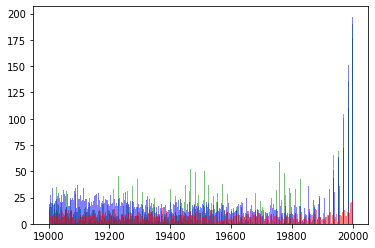

In [18]:
num_bins = 500
inc_e = 550000


# discrete
all_el = pd.read_hdf('data/Al_BSE_DS_normal_short_20eVBin.h5', 'all_electrons')
energyDS = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of discretly scattered BSE for 20 eV bins', len(energyDS)/inc_e)


#bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

n_d, bins_d, patches_d = plt.hist([float(energy) for energy in energyDS], num_bins, facecolor='green', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d)-1)]

trace_discr_20 = go.Scatter(x = np.asarray(bins_mean)/20000, 
                           y = n_d/inc_e, 
                          marker=dict(
                                 color = 'rgba(190, 186, 218 .9)',),
                         name = 'discrete 20eV bin',)


# discrete
all_el = pd.read_hdf('data/Al_BSE_DS_normal_short_10eVBin.h5', 'all_electrons')
energyDS = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of discretly scattered BSE for 10 eV bins', len(energyDS)/inc_e)


#bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

n_d, bins_d, patches_d = plt.hist([float(energy) for energy in energyDS], num_bins, facecolor='green', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d)-1)]

trace_discr_10 = go.Scatter(x = np.asarray(bins_mean)/20000, 
                           y = n_d/inc_e, 
                          marker=dict(
                                 color = 'rgba(128, 177, 24 .9)',),
                         name = 'discrete 10 eV bin',)

# discrete
all_el = pd.read_hdf('data/Al_BSE_DS_normal_short_2eVBin.h5', 'all_electrons')
energyDS = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of discretly scattered BSE for 2 eV bins', len(energyDS)/inc_e)


#bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

n_d, bins_d, patches_d = plt.hist([float(energy) for energy in energyDS], num_bins, facecolor='blue', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d)-1)]

trace_discr_1 = go.Scatter(x = np.asarray(bins_mean)/20000, 
                           y = n_d/inc_e, 
                          marker=dict(
                                 color = 'rgba(141, 211, 199 .9)',),
                         name = 'discrete 2 eV bin',)

# continuous
all_el = pd.read_hdf('data/Al_BSE_cont_normal_short_1eVBin.h5', 'all_electrons')
energy_cont = list(all_el[all_el.values=='backscattered']['energy'])

print ('yield of continuously scattered BSE', len(energy_cont)/inc_e)

n_c, bins_c, patches_c = plt.hist([float(energy) for energy in energy_cont], num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

trace_cont = go.Scatter(x = np.asarray(bins_mean)/20000, 
                        y = n_c/inc_e, 
                        marker=dict(
                               color = 'rgba(255, 195, 179, .9)',),
                        name = 'continuous',)



datatrace = [trace_discr_20, trace_discr_10, trace_discr_1, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
fig.show() # filename = 'normal 30 keV all BSE per 5eV ')

In [60]:
bin_sizes = [1,        2,      10,      20,     100 ]
yield_val = [ 0.01803, 0.0147, 0.00817, 0.00487, 0.0026]

cont_yield = [0.0063] * 5
trace_dir = go.Scatter(x = bin_sizes, 
                  y = yield_val, 
                        marker=dict(
                               color = 'rgba(128, 177, 24 .9)',),
                        name = 'direct',)

trace_cont = go.Scatter(x = bin_sizes, 
                  y = cont_yield, 
                        marker=dict(
                               color = 'rgba(255, 195, 179, .9)',),
                        name = 'Bethe',)

datatrace = [trace_dir, trace_cont]
layout = go.Layout(
        title = 'BSE yield versus integral binning', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE yield', 
             zerolinecolor='#969696', 
            # range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'integral bin size (eV)', 
             zerolinecolor='#969696', 
             #range=[9017, 10000]
        )
    )


fig = go.Figure(data=datatrace, layout=layout)
fig.show()

number of discretly scattered BSE 238977
number of continuously scattered BSE 126791


NameError: name 'py' is not defined

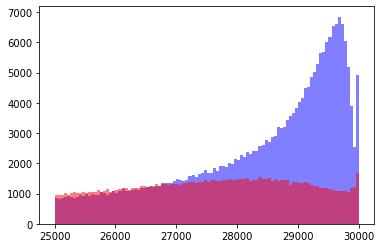

In [6]:
num_bins = 100

# discrete
all_el = pd.read_hdf('data/Al_BSE_DS_short.h5', 'all_electrons')
energyDS = list(all_el[all_el.values=='backscattered']['energy'])

print ('number of discretly scattered BSE', len(energyDS))

n_d, bins_d, patches_d = plt.hist(energyDS, num_bins, facecolor='blue', alpha=0.5)

bins_mean = [0.5 * (bins_d[i] + bins_d[i+1]) for i in range(len(n_d)-1)]

trace_discr = go.Scatter(x = bins_mean, 
                         y = n_d, 
                        marker=dict(
                               color = 'rgba(190, 174, 212 .9)',),
                        name = 'discrete',)




# continuous
all_el = pd.read_hdf('data/Al_BSE_cont_short.h5', 'all_electrons')
energy_cont = list(all_el[all_el.values=='backscattered']['energy'])

print ('number of continuously scattered BSE', len(energy_cont))

n_c, bins_c, patches_c = plt.hist(energy_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c)-1)]

trace_cont = go.Scatter(x = bins_mean, 
                        y = n_c, 
                        marker=dict(
                               color = 'rgba(253, 192, 134, .9)',),
                        name = 'continuous',)
                            


layout_log = go.Layout(
        title = '30 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 5 eV bin (#/5 eV)', 
             zerolinecolor='#969696', 
            # range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             #range=[9017, 10000]
        )
    )

datatrace = [trace_discr, trace_cont]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = 'short 30 keV BSE per 5eV at 70 tilt')

In [8]:
num_bins = 30

# continuous

#### classic
file_cont_classic = 'data/Al_BSE_tilt70_contclassical_Emin15000_Emax30000_bins10.h5'

h5data_c = h5py.File(file_cont_classic,'r+')   
print list(h5data_c.keys())
energy_cont = h5data_c[u'BSE']['block0_values'][0]

print 'number of continuously classically scattered BSE', len(energy_cont)

n_c, bins_c, patches_c = plt.hist(energy_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont_classic = go.Scatter(x = bins_mean, 
                        y = n_c/len(energy_cont), 
                        #marker=dict(
                         #      color = 'rgba(253, 192, 134, .9)',),
                        name = 'classic',)


#### JL
file_cont_JL = 'data/Al_BSE_tilt70_contJL_Emin15000_Emax30000_bins10.h5'

h5data_c = h5py.File(file_cont_JL,'r+')   
energy_cont = h5data_c[u'BSE']['block0_values'][0]

print 'number of continuously JL scattered BSE', len(energy_cont)

n_c, bins_c, patches_c = plt.hist(energy_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont_JL = go.Scatter(x = bins_mean, 
                        y = n_c/len(energy_cont), 
                        #marker=dict(
                             #  color = 'rgba(253, 192, 134, .9)',),
                        name = 'JL',)
                            

#### explicit    
file_cont_explicit = 'data/Al_BSE_tilt70_contexplicit_Emin15000_Emax30000_bins10.h5'

h5data_c = h5py.File(file_cont_explicit,'r+')   
energy_cont = h5data_c[u'BSE']['block0_values'][0]

print 'number of continuously explicit scattered BSE', len(energy_cont)

n_c, bins_c, patches_c = plt.hist(energy_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_cont_explicit = go.Scatter(x = bins_mean, 
                        y = n_c/len(energy_cont), 
                        #marker=dict(
                             ##  color = 'rgba(253, 192, 134, .9)',),
                        name = 'explicit',)



#### discrete    
file_ds = 'data/Al_BSE_tilt70_DSclassical_Emin15000_Emax30000_bins10.h5'

h5data_c = h5py.File(file_ds,'r+')   
energy_cont = h5data_c[u'BSE']['block0_values'][0]

print 'number of continuously explicit scattered BSE', len(energy_cont)

n_c, bins_c, patches_c = plt.hist(energy_cont, num_bins, facecolor='red', alpha=0.5)

bins_mean = [0.5 * (bins_c[i] + bins_c[i+1]) for i in range(len(n_c))]

trace_ds = go.Scatter(x = bins_mean, 
                        y = n_c/len(energy_cont), 
                        marker=dict(
                               color = 'rgba(190, 174, 212 .9)',),
                        name = 'discrete',)

layout_log = go.Layout(
        title = '30 keV incident electrons on a 70 degrees tilted Al sample', 
        font=dict( color='#7f7f7f'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        yaxis=dict(#type='log',
             gridcolor= '#7f7f7f',
             title = 'BSE counts per 5 eV bin (#/5 eV)', 
             zerolinecolor='#969696', 
            # range=[0, 350]   
        ), 
        xaxis=dict(
             gridcolor= '#7f7f7f',
             title = 'BSE energy (eV)', 
             zerolinecolor='#969696', 
             #range=[9017, 10000]
        )
    )

datatrace = [trace_cont_classic, trace_cont_JL, trace_cont_explicit, trace_ds]
fig = go.Figure(data=datatrace, layout=layout_log)
py.iplot(fig, filename = '30 keV BSE Bethe comparison')

SyntaxError: invalid syntax (<ipython-input-8-9c3395f83adc>, line 9)

In [25]:
file_ds = 'data/Al_BSE_tilt70_DSclassical_Emin15000_Emax30000_bins1000.h5'

h5data_c = h5py.File(file_ds,'r+')   
pathl = h5data_c[u'all_e']['block0_values'][0]

print 'number of discretely scattered BSE', len(pathl)
print np.mean(pathl)

file_ds = 'data/Al_BSE_tilt70_contclassical_Emin15000_Emax30000_bins1000.h5'

h5data_c = h5py.File(file_ds,'r+')   
pathl = h5data_c[u'all_e']['block0_values'][0]

print 'number of discretely scattered BSE', len(pathl)
print np.mean(pathl)

number of discretely scattered BSE 9999
164.5204277943622
number of discretely scattered BSE 9999
266.8649472785128


In [38]:
file = 'positions_70tilt_cont.out'

num_el = 200
pos = []
el = -1
x = [[] for i in range(num_el)]
y = [[] for i in range(num_el)]
z = [[] for i in range(num_el)]

 
with open(file) as f:
    lines = f.read().splitlines()

    for line in lines:
        pos = ([float(i) for i in line.strip('[').strip(']').split()])

        if (pos[2] == 0.0):
            el += 1
            x[el].append(pos[0])
            y[el].append(pos[1])
            z[el].append(-pos[2])
        else:
            x[el].append(pos[0])
            y[el].append(pos[1])
            z[el].append(-pos[2])


IndexError: list index out of range

In [29]:
data = []
trace = [[] for i in range(num_el)]
for i in range(0, 15):

    trace[i] = go.Scatter(
        x = x[i],
        y = z[i],
        mode = 'lines+markers', 
        name = 'electron '+str(i)
    )
    data.append(trace[i])

layout = go.Layout(
    title = '20 kV incident electrons on a 50 degrees tilted Al sample', 
    font=dict( color='#7f7f7f'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(
        gridcolor= '#7f7f7f', 
        title = 'z(A)', 
        zerolinecolor='#ffffff'
        #autorange='reversed'
    ), 
    xaxis=dict(
        gridcolor= '#7f7f7f',
        title = 'x(A)', 
        zerolinecolor='#969696'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='xz_scater')

In [60]:
el = 4
trace = go.Scatter3d(
    x=x[el],
    y=y[el],
    z=z[el],
    mode='line',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=3,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-one_electron')

In [20]:

file_tR = 'thetaR_50tilt.out'

thetaR = []
with open(file_tR) as f:
    lines = f.read().splitlines()
thetaR = [float(line) for line in lines]


file_tG = 'thetaG_50tilt.out'

thetaG = []
with open(file_tG) as f:
    lines = f.read().splitlines()
thetaG = [float(line) for line in lines]


file_tM = 'thetaM_50tilt.out'

thetaM = []
with open(file_tM) as f:
    lines = f.read().splitlines()
thetaM = [float(line) for line in lines]


file_pR = 'phiR_50tilt.out'

phiR = []
with open(file_pR) as f:
    lines = f.read().splitlines()
phiR = [float(line) for line in lines]


file_pG = 'phiG_50tilt.out'

phiG = []
with open(file_pG) as f:
    lines = f.read().splitlines()
phiG = [float(line) for line in lines]

file_pM = 'phiM_50tilt.out'

phiM = []
with open(file_pM) as f:
    lines = f.read().splitlines()
phiM = [float(line) for line in lines]



print len(phiM), len(thetaM)
print len(phiG), len(thetaG)
data_thetaR = [go.Histogram(x = np.degrees(thetaR), 
                      name = 'theta Rutherford')      
       ]

data_phiR = [go.Histogram(x = phiR, 
                      name = 'phi Rutherford')      
       ]
        
data_thetaG = [go.Histogram(x = np.degrees(thetaG), 
                          autobinx = False,
                         #xbins =dict(start = 0., 
                         #        end = 1.57, 
                         #        size = 0.01571, ) , 
                             histnorm='probability',
                             name = 'theta Gryzinski'), 
              ]


data_phiG = [go.Histogram(x = phiG, 
                          autobinx = False,
                         xbins =dict(start = 0., 
                                 end = 6.28, 
                                 size = 0.7854, ) , 
                      name = 'phi Gryzinski')      
       ]               
               
    
data_thetaM = [go.Histogram(x = np.degrees(thetaM), 
                          autobinx = False,
                         #xbins =dict(start = 0., 
                         #        end = 1.57, 
                         #        size = 0.01571, ) , 
                             histnorm='probability',
                     name = 'theta Moller'), 
              ]


data_phiM = [go.Histogram(x = phiM, 
                          autobinx = False,
                         xbins =dict(start = 0., 
                                 end = 3.14, 
                                 size = 0.1571, ) , 
                         name = 'phi Moller')      
       ]               

py.iplot(data_thetaG, filename='polar angles')

#print data_thetaG[0]['x']

11971 11971
5653 5653


In [21]:
py.iplot(data_thetaM, filename='polar angles')

In [190]:
import numpy as np
from math import acos

x = np.random.rand(10000)

alpha =  3.4*(13.**(0.67))/(20000.)


c_Theta = (1. - (2.*alpha*x)/(1. + alpha - x))
c2_halfTheta =  1.-(alpha*x /(1. + alpha-x))

print min(c_Theta), max(c_Theta)
print np.arccos(max(c_Theta)), np.arccos(min(c_Theta))
print c_Theta[0:10]
print np.arccos(c_Theta[0:10])

hist_thetaR_or = np.histogram(np.degrees([acos(cosValue) for cosValue in c_Theta]), density=True)

data_thetaR_or = [go.Scatter(x = hist_thetaR_or[1]+9,
                             y = hist_thetaR_or[0], 
                             #nbinsx = 100, 
                             name = 'theta R'), 
              ]
               
    
data_thetaR = [go.Histogram(x = np.degrees(2.*np.arccos(c2_halfTheta**0.5)), 
                             nbinsx = 100, 
                             name = 'theta R'), 
              ]
               
               
py.iplot(data_thetaR_or, filename='polar angles')

-0.741652546863333 0.9999998156620046
0.0006071869581719088 2.406326945616268
[0.99994852 0.9896637  0.99904666 0.98309125 0.99861368 0.9948864
 0.99952285 0.99992426 0.99983678 0.99870184]
[0.01014698 0.14390384 0.04366903 0.18415548 0.05266196 0.10117274
 0.03089288 0.01230764 0.01806774 0.05095959]


In [191]:
py.iplot(data_thetaR, filename='polar angles')

In [61]:
py.iplot(data_phiG, filename='polar angles')

In [15]:
all_el = pd.read_hdf('data/Al_BSE_DS_normal_short.h5', 'all_electrons')
az_moller = list(all_el['az_angle'])


#print (all_el['az_angle'])
#print (all_el['types'])
first_angles = [angles[0] for angles in all_el['az_angle']]
first_types = [types[0] for types in all_el['types']]

# print (first_angles[first_types=='Rutherford'])
#print (first_types)
# print (np.where(np.asarray(first_types)=='Rutherford')[0])
Rutherford =  [first_angles[index] for index in np.where(np.asarray(first_types)=='Rutherford')[0]] 
Quinn =  [first_angles[index] for index in np.where(np.asarray(first_types)=='Quinn')[0]] 
Moller =  [first_angles[index] for index in np.where(np.asarray(first_types)=='Moller')[0]] 
Gryz =  [first_angles[index] for index in np.where(np.asarray(first_types)=='Gryzinski2p')[0]] 

#print (first_angles)

        
fig = go.Figure(data=[go.Histogram(x=first_angles,
                                  xbins = dict(
                                  start = 0, 
                                  end = 1, 
                                  size = 0.001   
                                  ),
                                  autobinx=False)])
fig.show()

In [8]:

fig = go.Figure(data=[go.Histogram(x=np.degrees(2*np.arccos(np.asarray(first_angles)**0.5)))])
fig.show()

In [24]:
fig = go.Figure(data=[go.Histogram(x=np.degrees(2*np.arccos(np.asarray(Rutherford)**0.5)))])

print(np.degrees(2*np.arccos(0.9999)))
fig.show()

1.6205828741313097


In [17]:
fig = go.Figure(data=[go.Histogram(x=Rutherford, 
                                  xbins = dict(
                                  start = 0, 
                                  end = 1, 
                                  size = 0.0001   
                                  ),
                                  
                                  autobinx=False
                                  )])
fig.show()

In [46]:
import random

def Rutherford_azimuthal(energy, Z):
    '''
    compute the azimuthal angle for Rutherford scattering
    as a half angle
    '''

    alpha =  3.4*(Z**(0.67)) / energy
    rn = random.random()
    c2_halfTheta = 1. - (alpha*rn/(1. + alpha - rn))

    return c2_halfTheta

cos2 = [Rutherford_azimuthal(20000, 16) for i in range(10000)]

fig = go.Figure(data=[go.Histogram(x=np.degrees(2*np.arccos(np.asarray(cos2)**0.5)), 
                                  xbins = dict(
                                  start = 0, 
                                  end = 180, 
                                  size = 0.2   
                                  ),
                                  
                                  autobinx=False
                                  )])
fig.show()


In [11]:
fig = go.Figure(data=[go.Histogram(x=Moller)])
fig.show()

In [43]:
from plotly.subplots import make_subplots

def binaryCollModel(energy, e_loss):
    return 0.5*( (1. - (e_loss / energy)**0.5) + 1.)

e = 30000
w = np.linspace(73.5, 30000, 1000)
cos2hT = binaryCollModel(e, w)

fig = make_subplots(rows=1, cols=2)


data1 = go.Scatter(     x = w, 
                        y = cos2hT)

fig.add_trace(data1, row=1, col=1)


data2 = go.Scatter(     x = w, 
                        y = np.degrees(2*np.arccos(np.asarray(cos2hT)**0.5)))

fig.add_trace(data2, row=1, col=2)

fig.update_xaxes(title_text="W", row=1, col=1)
fig.update_xaxes(title_text="W", row=1, col=2)

fig.update_yaxes(title_text="cos2hT", row=1, col=1)
fig.update_yaxes(title_text="theta", row=1, col=2)

fig.show()

In [108]:
fig = go.Figure(data=[go.Histogram(x=Quinn)])
fig.show()

In [32]:
fig = go.Figure(data=[go.Histogram(x=Gryz)])
fig.show()

In [47]:


data = [
    go.Scatterpolar(
        r = df['x1'],
        theta = df['y'],
        mode = 'lines',
        name = 'Figure8',
        line =  dict(
            color = 'peru'
        )
    ),
    go.Scatterpolar(
        r = df['x2'],
        theta = df['y'],
        mode = 'lines',
        name = 'Cardioid',
        line =  dict(
            color = 'darkviolet'
        )
    ),
    go.Scatterpolar(
        r = df['x3'],
        theta = df['y'],
        mode = 'lines',
        name = 'Hypercardioid',
        line =  dict(
            color = 'deepskyblue'
        )
    ),
    go.Scatterpolar(
        r = df['x4'],
        theta = df['y'],
        mode = 'lines',
        name = 'orangered',
        line =  dict(
            color = 'orangered'
        )
    ),
    go.Scatterpolar(
        r = df['x5'],
        theta = df['y'],
        mode = 'lines',
        name = 'Supercardioid',
        line =  dict(
            color = 'green'
        )
    )
]

layout = go.Layout(
    title = 'Mic Patterns',
    font = dict(
        family = 'Arial, sans-serif;',
        size = 12,
        color = '#000'
    ),
    showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'polar-line')

NameError: name 'df' is not defined